# Practical 6: Regression Models

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [73]:
df = pd.read_csv('data/HousePricesData-Address-City-Features_fromZillow.csv', sep=';')
df.head()

,zpid,zipcode,street,city,state,year,bath,bed,rooms,SqFt,price
0,956068,35212,868 44th Pl N,Birmingham,AL,1930,2.0,3,7,1732,40745
1,924224,35204,518 6th Ave N,Birmingham,AL,1930,1.0,2,6,1115,205906
2,906733,35215,119 Moonglow Dr,Birmingham,AL,1982,2.0,3,11,1355,98672
3,964007,35205,1036 31st St S,Birmingham,AL,1919,2.5,4,7,2876,325474
4,74504350,99801,350 Irwin St APT 204,Juneau,AK,1966,1.0,1,3,476,114726


In [74]:
# remove the street information in order to anonymise
df = df.drop(['street'], axis=1)
df.head()

,zpid,zipcode,city,state,year,bath,bed,rooms,SqFt,price
0,956068,35212,Birmingham,AL,1930,2.0,3,7,1732,40745
1,924224,35204,Birmingham,AL,1930,1.0,2,6,1115,205906
2,906733,35215,Birmingham,AL,1982,2.0,3,11,1355,98672
3,964007,35205,Birmingham,AL,1919,2.5,4,7,2876,325474
4,74504350,99801,Juneau,AK,1966,1.0,1,3,476,114726


In [75]:
# the data. Explore the data with str and summary.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   zpid     799 non-null    int64  
 1   zipcode  799 non-null    int64  
 2   city     799 non-null    object 
 3   state    799 non-null    object 
 4   year     799 non-null    int64  
 5   bath     799 non-null    float64
 6   bed      799 non-null    int64  
 7   rooms    799 non-null    int64  
 8   SqFt     799 non-null    int64  
 9   price    799 non-null    int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 62.6+ KB


In [76]:
df.describe()


,zpid,zipcode,year,bath,bed,rooms,SqFt,price
count,7.990000e+02,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,7.990000e+02
mean,3.735365e+07,49956.694618,1950.546934,2.039124,3.217772,6.708385,1792.032541,2.527968e+05
std,8.007303e+07,28500.550957,32.634107,0.929804,1.245598,2.332363,879.377884,2.057707e+05
min,9.060050e+05,2121.000000,1820.000000,1.000000,0.000000,2.000000,440.000000,4.007400e+04
25%,1.030299e+07,35215.000000,1927.000000,1.000000,3.000000,5.000000,1196.500000,1.250580e+05
50%,2.830012e+07,53207.000000,1951.000000,2.000000,3.000000,6.000000,1536.000000,1.798860e+05
75%,5.909799e+07,73162.000000,1980.000000,2.000000,4.000000,8.000000,2146.000000,2.971205e+05
max,2.146963e+09,99801.000000,2014.000000,7.000000,14.000000,21.000000,5938.000000,1.608791e+06


<Figure size 2400x1600 with 0 Axes>

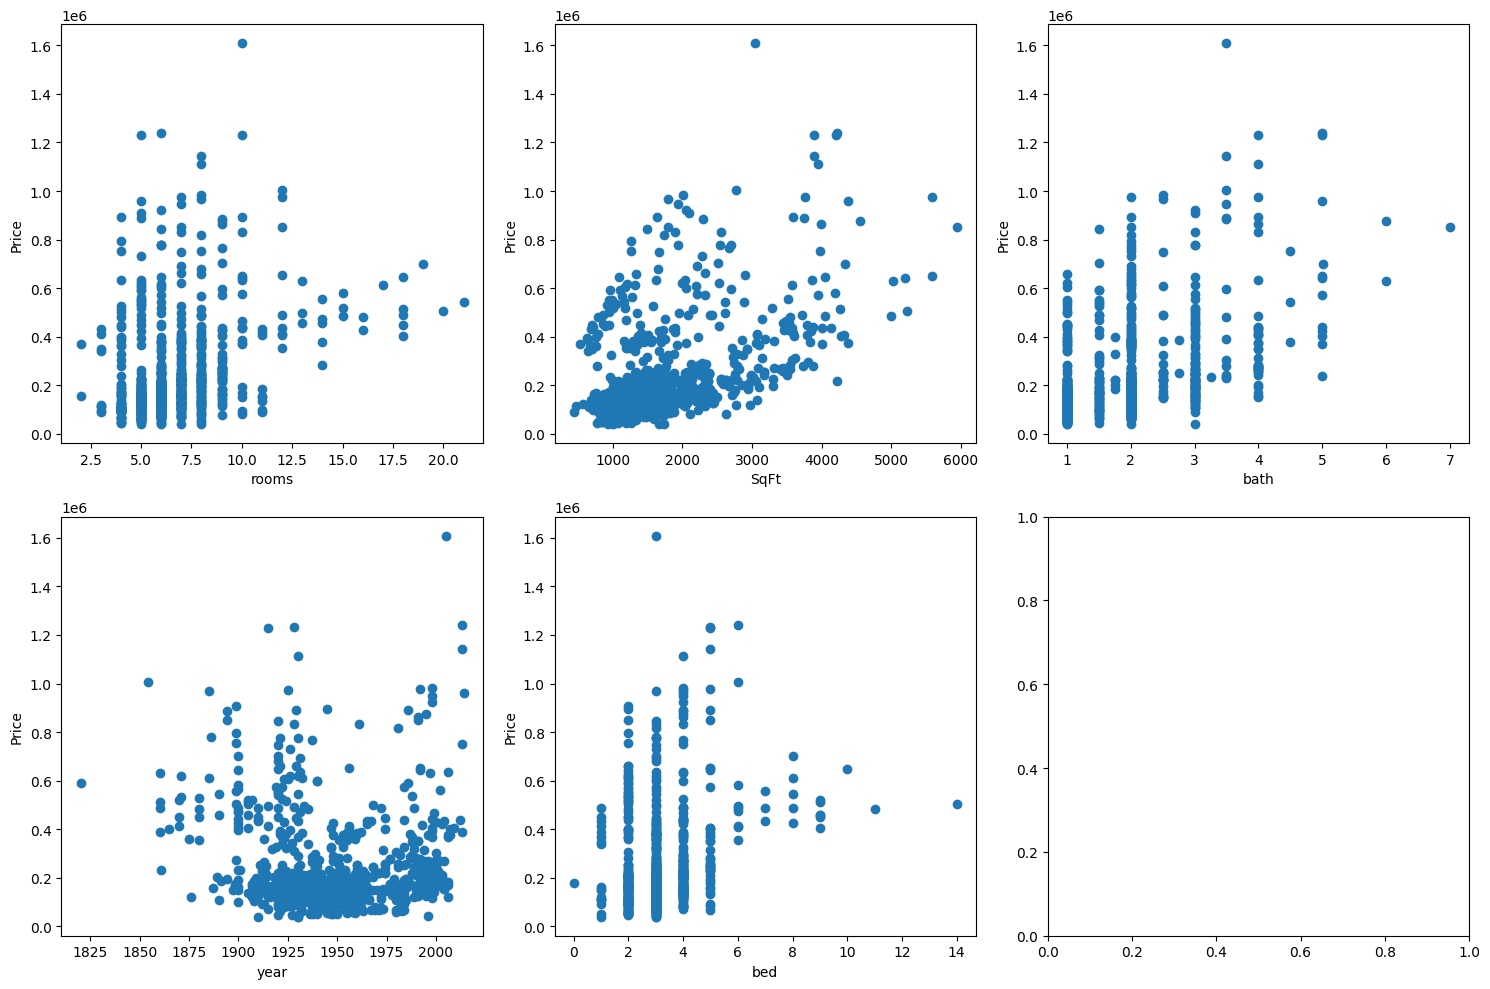

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 16))
fig, axs = plt.subplots(2, 3, figsize=(15, 10)) 
columns = ['rooms', 'SqFt', 'bath', 'year', 'bed']

k=0
for i, ax_row in enumerate(axs):
    for j, ax in enumerate(ax_row):
        if k == len(columns):
            break
        col = columns[k]
        k+=1
        ax.scatter(x=df[col], y=df['price'])
        ax.set_xlabel(col)  # Set xlabel for each subplot
        ax.set_ylabel('Price')  # Set ylabel for each subplot

plt.tight_layout()  # Adjust the layout to prevent overlapping subplots
plt.show()


Do you see any interesting relationship between the price and the other variables?

Its look like the highest sqft and number of rooms the highest price.
The same thing about number of bath.

I dont see correlation between year and price, but mayby ther its look a bit like ther are some old 
and expensive buldings.
Ther is not a correlation between bed number and proices.

In [78]:
# 3. Randomly split the dataset into 75% train and 25% test.
from sklearn.model_selection import train_test_split

X = df[df.select_dtypes(include=np.number).columns.tolist()]
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

4. Fit several regression models to the training data but only using the numerical
attributes: a linear model (using the lm function, which fits a linear model using
ordinary least squares), a regression tree (CART) from the rpart package (set the
parameter method to anova in order to produce a CART tree), and a neural network
from the nnet package (set the parameters skip and linout-numerical output- to
TRUE and size-hidden units- to 12).



In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = {
    'linear': LinearRegression(),
    'tree': DecisionTreeRegressor(),
    'neural': MLPRegressor(hidden_layer_sizes=(12,), max_iter=1000)
}

rmses = []
maes = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    mae = mean_absolute_error(y_test, predictions)
    rmses.append(rmse)
    maes.append(mae)


/home/igor/.conda/envs/ml/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


In [80]:
pd.DataFrame({'RMSE': rmses, 'MAE': maes}, index=models.keys())

,RMSE,MAE
linear,1.378960e-08,1.166874e-08
tree,3.537309e+04,5.204615e+03
neural,1.158780e+04,9.390829e+03


[Text(0.5, 0.9, 'node #0\nprice <= 411509.0\nsquared_error = 41644511204.905\nsamples = 599\nvalue = 258649.327'),
 Text(0.25, 0.7, 'node #1\nprice <= 215070.5\nsquared_error = 7279303700.992\nsamples = 500\nvalue = 182454.008'),
 Text(0.125, 0.5, 'node #2\nprice <= 137838.0\nsquared_error = 1866543268.835\nsamples = 358\nvalue = 138860.612'),
 Text(0.0625, 0.3, 'node #3\nprice <= 95967.0\nsquared_error = 656069931.913\nsamples = 174\nvalue = 101755.437'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'node #344\nprice <= 178577.5\nsquared_error = 478052661.65\nsamples = 184\nvalue = 173949.201'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'node #699\nprice <= 308427.0\nsquared_error = 4055455151.729\nsamples = 142\nvalue = 292358.486'),
 Text(0.3125, 0.3, 'node #700\nprice <= 247412.0\nsquared_error = 579499906.19\nsamples = 89\nvalue = 247335.112'),
 Text(0.28125, 0.1, '\n  (...)  \n')

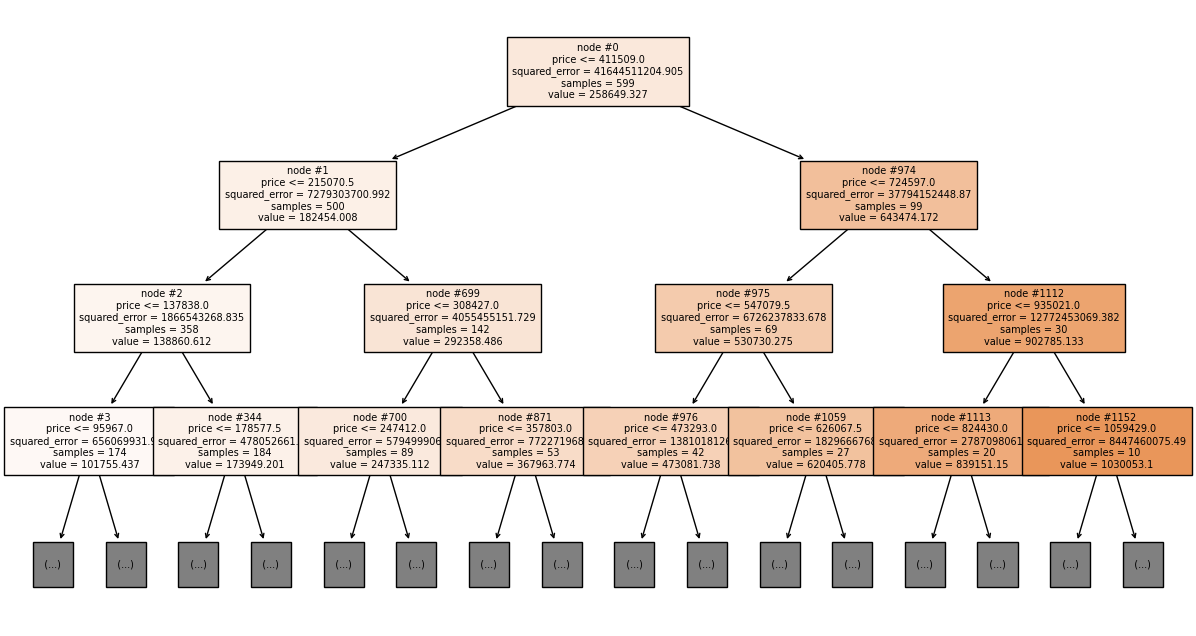

In [82]:
from tkinter import font
from sklearn import tree

plt.figure(figsize=(15, 8))  # Adjust the dimensions as needed

tree.plot_tree(models['tree'], max_depth=3, fontsize=7, feature_names=X.columns.tolist(), node_ids=True, filled=True)


Which one is the less informative?


nural network

6. Prune the regression tree using the prune function and setting the cp parameter to
the value you consider is a good balance between complexity and performance (the
plotcp function plots tree sizes and relative errors for different values of the
complexity parameter). Visualise the new tree

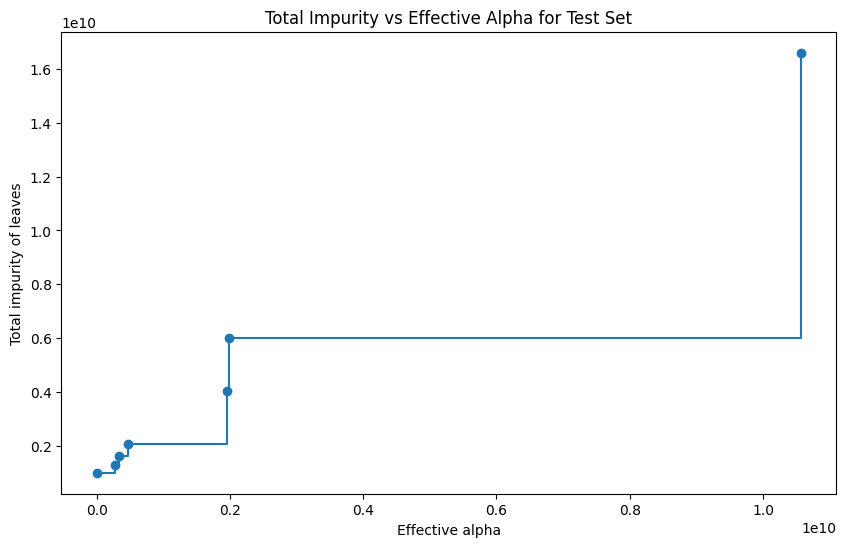

0.0

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

pruned_tree = DecisionTreeRegressor(max_depth=3)
pruned_tree.fit(X_train, y_train)
# The ccp_alpha parameter represents the complexity parameter (cp) in pruning.
# You can find the optimal value of ccp_alpha by using the prune_path attribute 
# of the fitted decision tree. 
# Get the pruning path
path = pruned_tree.cost_complexity_pruning_path(X_test, y_test)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot tree sizes and relative errors for different values of the complexity parameter
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs Effective Alpha for Test Set")
plt.show()

# Find the best ccp_alpha value
best_alpha = ccp_alphas[np.argmin(impurities)]
best_alpha


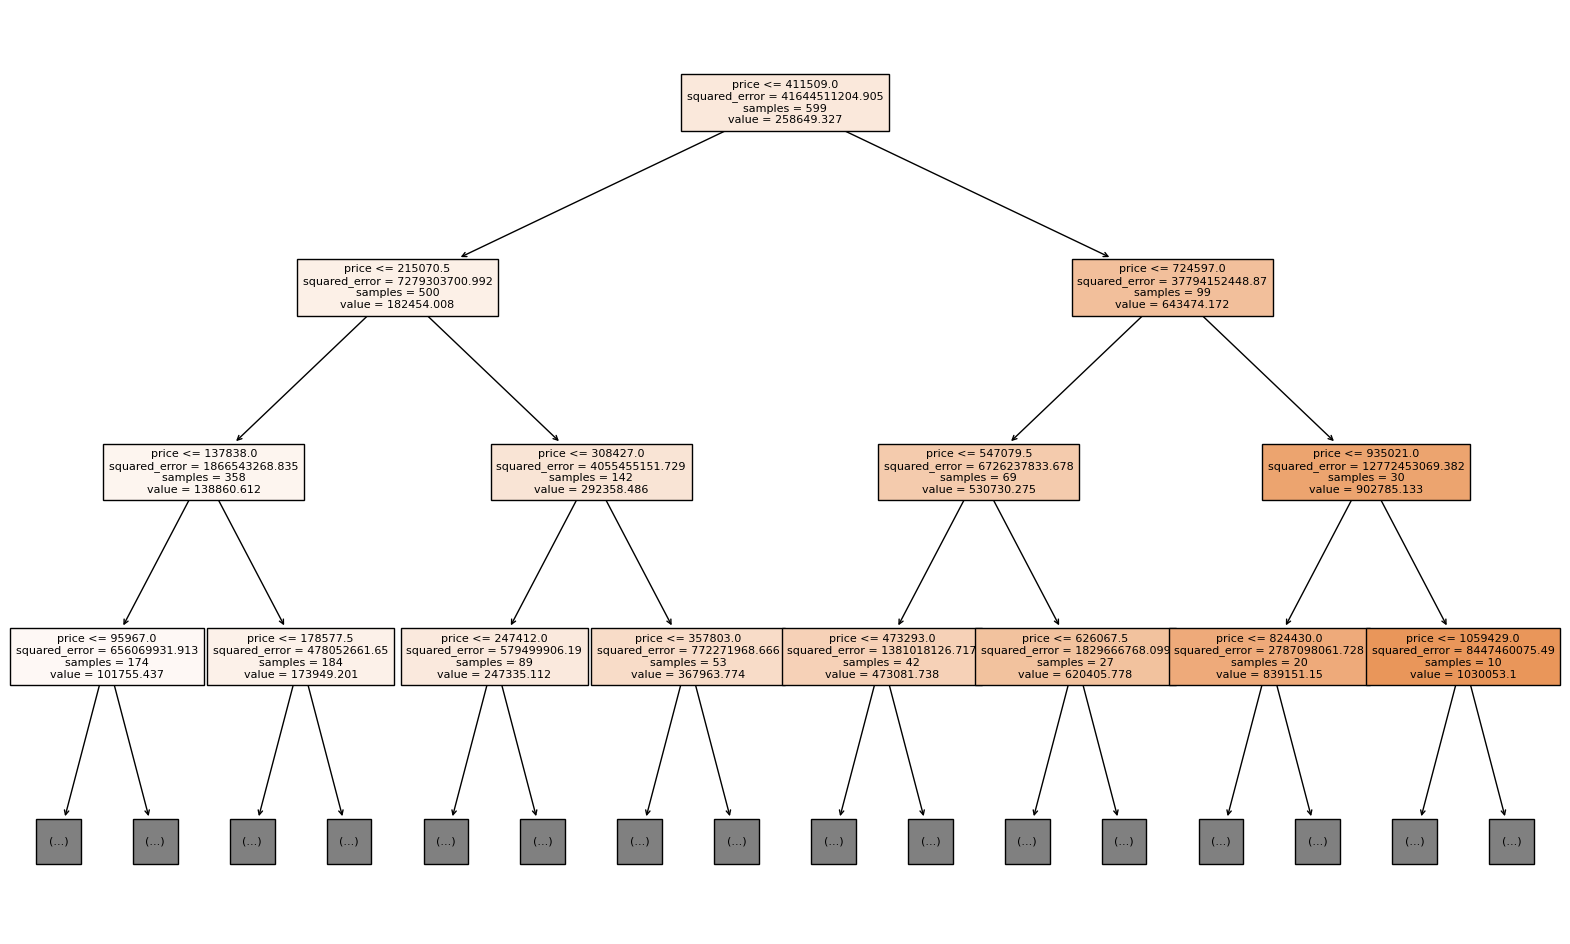

In [ ]:
# Prune the tree using the best ccp_alpha value
pruned_tree = DecisionTreeRegressor(ccp_alpha=best_alpha)
pruned_tree.fit(X_train, y_train)

# Visualize the pruned tree
plt.figure(figsize=(20, 12))
tree.plot_tree(pruned_tree, filled=True, fontsize=8, max_depth=3, feature_names=X.columns.tolist())
plt.show()


In [ ]:
# Compare how each method works using the Root Mean Square Error (RMSE) and
# the Mean Absolute Error (MAE) for the training and test data sets. Which model
# performs better for the training data? And for the test data?

from sklearn.metrics import mean_squared_error, mean_absolute_error

models = {
    'linear': LinearRegression(),
    'tree': DecisionTreeRegressor(),
    'neural': MLPRegressor(hidden_layer_sizes=(12,), max_iter=1000)
}

rmses_train = []
maes_train = []
rmses_test = []
maes_test = []
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
    mae_test = mean_absolute_error(y_test, predictions_test)
    rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    mae_train = mean_absolute_error(y_train, predictions_train)
    rmses_train.append(rmse_train)
    maes_train.append(mae_train)
    rmses_test.append(rmse_test)
    maes_test.append(mae_test)

In [ ]:
result = pd.DataFrame({'model': models.keys() ,'RMSE Train': rmses_train, 'MAE Train': maes_train, 'RMSE Test': rmses_test, 'MAE Test': maes_test})
result

,model,RMSE Train,MAE Train,RMSE Test,MAE Test
0,linear,4.261789e-08,1.333449e-08,1.378960e-08,1.166874e-08
1,tree,0.000000e+00,0.000000e+00,3.530641e+04,4.816150e+03
2,neural,3.647235e+04,2.571578e+04,2.932110e+04,2.372232e+04


In [ ]:
from itables import show
show(result)

For training data the best perform regresion tree model. For test data the best was linear regresion model. 

8. Can you improve the results by changing the parameters or trying other methods?

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid = {
    'n_estimators': [10, 20, 30, 50, 100, 200, 300],
    'max_depth': [None, 3, 5, 8, 10, 15, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=2, n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

best_rf_reg = grid_search.best_estimator_
test_predictions = best_rf_reg.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_mae = mean_absolute_error(y_train, predictions_train)
print("Test RMSE with Best Model:", test_rmse)
print("Test MAE with Best Model:", test_mae)


Fitting 5 folds for each of 504 candidates, totalling 2520 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time=   0.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=20;